In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats
np.set_printoptions(suppress=True)
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

In [2]:
pd.__version__

'0.24.2'

In [3]:
# Load big data (change to whatever the data is)
df = pd.read_csv('D:/iat_estimates/big_data.csv')

In [4]:
print(df.shape)

(991064, 37)


In [5]:
df.head()

,v1,v2,a1,a2,tplus,tminus,v1_median,v2_median,a1_median,a2_median,...,stim,session_id,age,birthsex,raceomb_002,Mn_RT_all_3467,edu,politicalid_7,religionid,countrycit_num
0,1.534390,4.977987,1.674220,2.287393,0.407426,1.082949,1.544282,4.966865,1.662154,2.279453,...,african,2624629235,42,2.0,6.0,979.083333,7.0,NaN,3.0,1.0
1,1.197906,3.783108,2.651722,3.240585,0.317577,0.617117,1.200728,3.775492,2.655440,3.246028,...,african,2624629236,42,1.0,6.0,1319.991667,7.0,1.0,3.0,1.0
2,1.677701,4.934787,1.704791,2.680107,0.287845,0.730182,1.681638,4.917554,1.689489,2.707129,...,african,2624629265,63,2.0,6.0,842.241667,9.0,2.0,4.0,1.0
3,1.958066,5.497574,1.567636,2.503440,0.273528,1.088728,1.977463,5.494710,1.559786,2.500854,...,african,2624629266,27,2.0,7.0,733.191667,4.0,4.0,2.0,1.0
4,1.745218,4.260113,1.251818,1.953958,0.255119,0.429691,1.748763,4.270192,1.245527,1.946469,...,african,2624629296,22,1.0,6.0,660.441667,5.0,6.0,1.0,39.0


In [6]:
df.describe()

,v1,v2,a1,a2,tplus,tminus,v1_median,v2_median,a1_median,a2_median,...,cor_tplus_tminus,session_id,age,birthsex,raceomb_002,Mn_RT_all_3467,edu,politicalid_7,religionid,countrycit_num
count,991064.000000,991064.000000,991064.000000,991064.000000,991064.000000,991064.000000,991064.000000,991064.000000,991064.000000,991064.000000,...,991064.000000,9.910640e+05,991064.000000,988876.000000,917576.000000,990253.000000,958738.000000,813125.000000,976424.000000,976763.000000
mean,1.563134,2.914221,1.926848,2.209714,0.320813,0.907938,1.565155,2.913494,1.916630,2.205770,...,0.220981,2.630865e+09,26.954978,1.617241,5.795417,939.353201,5.971294,4.744978,2.071987,19.826063
std,0.569453,1.318227,0.467420,0.623937,0.091789,0.596876,0.569789,1.319384,0.465833,0.633922,...,0.109300,3.947914e+06,11.846802,0.486060,1.204034,225.596218,2.474427,1.658024,0.999711,54.010147
min,0.000347,0.001445,0.484082,0.633518,0.000004,0.000002,-0.001556,0.002198,0.482593,0.631060,...,-0.529198,2.624220e+09,10.000000,1.000000,1.000000,390.600000,1.000000,1.000000,1.000000,1.000000
25%,1.175195,1.797261,1.587754,1.695086,0.266309,0.574829,1.176704,1.796024,1.579424,1.681613,...,0.157073,2.627103e+09,19.000000,1.000000,6.000000,778.383333,4.000000,4.000000,1.000000,1.000000
50%,1.484223,2.694638,1.867771,2.173464,0.322421,0.765385,1.486413,2.691977,1.856594,2.157737,...,0.206822,2.631014e+09,22.000000,2.000000,6.000000,898.800000,5.000000,5.000000,2.000000,1.000000
75%,1.865436,3.982286,2.203310,2.708070,0.377790,1.037791,1.868281,3.981134,2.190100,2.715672,...,0.302739,2.634194e+09,32.000000,2.000000,6.000000,1056.108333,7.000000,6.000000,3.000000,1.000000
max,7.017173,7.877268,5.062587,5.096639,2.727644,4.999928,7.041613,7.895298,5.046791,5.104567,...,0.600771,2.637618e+09,80.000000,2.000000,8.000000,4996.916667,14.000000,7.000000,4.000000,241.000000


In [7]:
# plt.scatter(df_by_age['age'], df_by_age['v1'])

# Bayesian regression helper function

In [9]:
def fit_polynomial_regression(df, order=2, 
                              figsize=(20, 14), 
                              fontsize_lab=16, 
                              fontsize_metric=16, 
                              fontsize_legend=16,
                              color_pred='#729e84', 
                              which='first',
                              filename=None):
    
    """
    Fits a polynomial regression of the corresponding predictor to the data.
    """
    
    # Drop NA means
    df = df.dropna(subset=['Mn_RT_all_3467'])
    
    # Group by age for mean age
    df_by_age = df.groupby('age', as_index=False).mean()
    df_by_age_std = df.groupby('age', as_index=False).std()

    # Extract ages
    age_mean = df['age'].values.mean()
    age_std = df['age'].values.std() 
    age_pred = df_by_age['age'].values
    age = df['age'].values

    age_z = (age - age_mean) / age_std
    age_pred_z =(age_pred - age_mean) / age_std

    # Extract all ages for fitting
    X = np.vander(age_z, order+1, increasing=True)[:, 1:].astype(np.float32)

    # Extract ages 10 - 80 for prediction
    X_pred = np.vander(age_pred_z, order+1, increasing=True)[:, 1:].astype(np.float32)
    X_plot = X_pred[:, 0] * age_std + age_mean

    # Predictor names
    if which == 'first':
        predictors = ['Mn_RT_all_3467', 'v1', 'a1', 'tplus']
    else:
        predictors = ['Mn_RT_all_3467', 'v2', 'a2', 'tminus']
    y_labels = ['Mean response time (ms)', 'Drift rate', 'Boundary separation', 'Non-decision time']
    y_legend_d = ['Data mean', 'Parameter mean',  'Parameter mean',  'Parameter mean']
    y_legend_p = ['Data variability', 'Parameter variability',  'Parameter variability',  'Parameter variability']

    # Prepare plot
    f, axarr = plt.subplots(2, 2, figsize=figsize)

    for i, (ax, p) in enumerate(zip(axarr.flat, predictors)):

        # Extract predictor
        y = df[p].astype(np.float32)
        y_true = df_by_age[p].astype(np.float32)
        y_true_std = df_by_age_std[p].astype(np.float32)

        # Fit model
        model = BayesianRidge(compute_score=True)
        model.fit(X, y)

        # Make predictions
        y_mean, y_std = model.predict(X_pred, return_std=True)

        # Compute R2
#         r2 = r2_score(y_true, model.predict(X_pred))
#         ax.text(0.1, 0.9, '$R^2$={:.3f}'.format(r2),
#         horizontalalignment='left',
#         verticalalignment='center',
#         transform=ax.transAxes, 
#         fontsize= fontsize_metric)

    #     ax.fill_between(X_pred[:, 0], y_mean-1.98*y_std, y_mean+1.98*y_std, color='green',alpha=0.1)
            
        # Plot data
        ax.scatter(X_plot, y_true, color='black', label=f'{y_legend_d[i]}',s=45)
        # Plot every second error bar (looks nicer)
        ax.errorbar(X_plot[::2], y_true[::2], y_true_std[::2], capsize=4,
                    color='black', alpha=0.35, linewidth=1, label=f'{y_legend_p[i]}')
        
        # Plot model predictions
        ax.fill_between(X_plot, y_mean-y_std, y_mean+y_std, color=color_pred, 
                        alpha=0.3, label='Predictive uncertainty')
        ax.plot(X_plot, y_mean, color=color_pred, alpha=0.8, label='Predictive mean', lw=3)
        
        sns.despine(ax = ax)
        ax.set_ylabel(y_labels[i], fontsize=fontsize_lab)
        ax.set_xlabel('Age', fontsize=fontsize_lab)
        ax.xaxis.set_tick_params(labelsize=fontsize_lab-2)
        ax.yaxis.set_tick_params(labelsize=fontsize_lab-2)
        ax.legend(loc='lower right', fontsize=fontsize_legend)
        ax.grid(alpha=0.2)
        
    f.tight_layout()
    
    if filename is not None:
        f.savefig(filename, dpi=300)

In [10]:
# df_by_age = df.groupby('age', as_index=False).mean()
# df_by_age.to_csv('iat_grouped.csv', index=False, header=True, sep=';')

## Fit v1, a1, ndt_pos

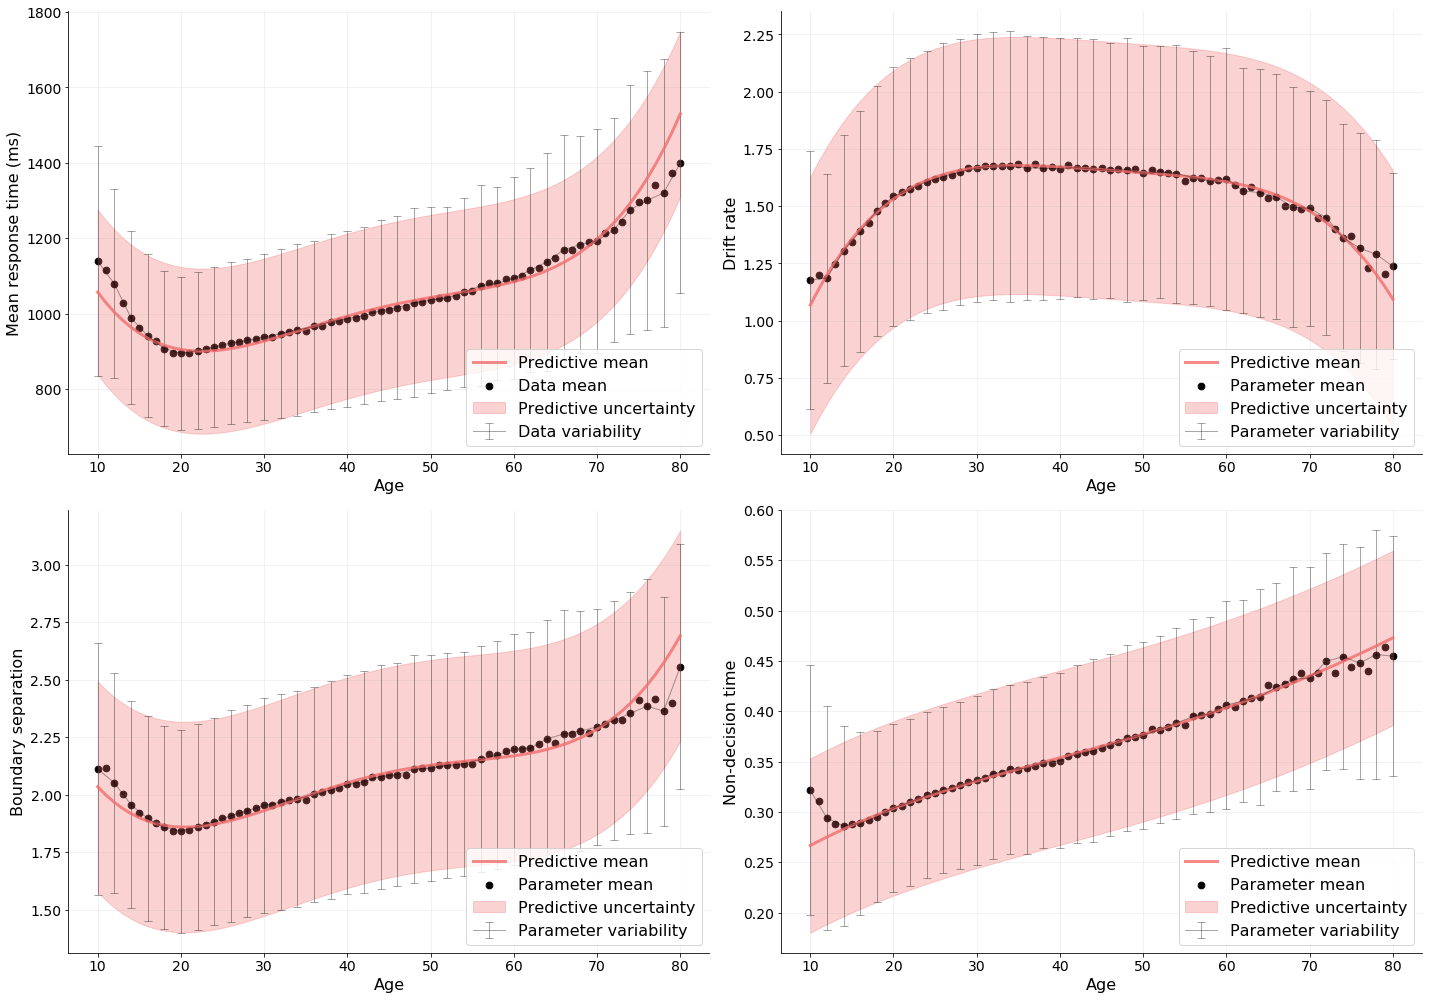

In [13]:
fit_polynomial_regression(df, order=4, color_pred='#f26d6d', filename='Results_Preliminary.png')

## Fit v2, a2, ndt_neg

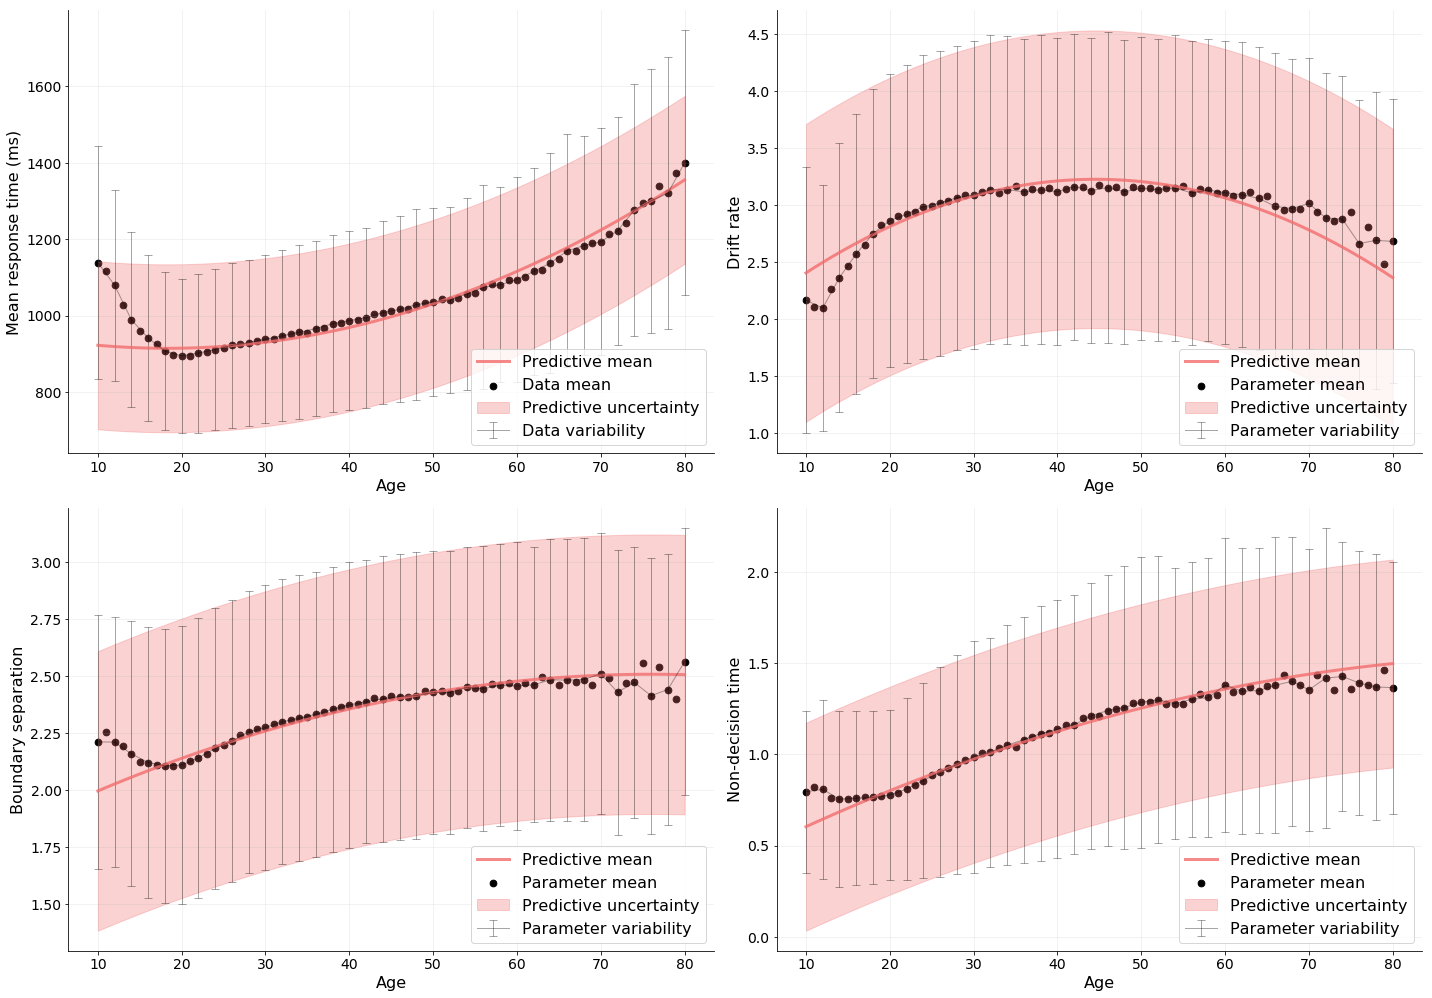

In [15]:
fit_polynomial_regression(df, order=2, color_pred='#f26d6d', filename='Results_Preliminary2.png', which='second')

# Plots of v1 by group

In [9]:
# Drop NA
df = df.dropna(subset=['age', 'birthsex', 'edu', 'countrycit_num'])

# Create  new variables
df['college'] = (df['edu'] >= 6).astype(int)
df['usa'] = (df['countrycit_num'] == 1).astype(int)


# df_by_age_col = df.groupby(['college', 'age'], as_index=False)
# df_by_age_usa = df.groupby(['usa', 'age'], as_index=False)
# df_by_age_sex = df.groupby(['birthsex', 'age'], as_index=False)

In [10]:
# Group data frame
df_grouped = df.groupby(['usa', 'college', 'birthsex', 'age'], as_index=False).mean()
# Set everybody below 18 who has college to nan
df_grouped['v1'][(df_grouped['age'] < 18) & (df_grouped['college'] == 1)] = np.nan

D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


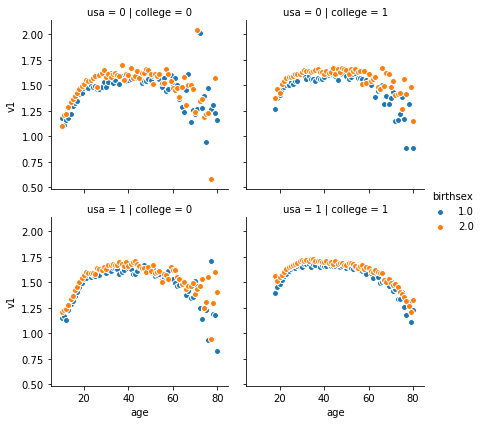

In [123]:
# Quick and dirty plot
graph = sns.FacetGrid(df_grouped, col='college', row='usa', hue='birthsex')
graph.map(plt.scatter, "age", "v1", edgecolor ="w").add_legend() 

In [11]:
# f, ax = plt.subplots(1, 1, figsize=(15, 20))
# sns.boxplot(x='age', y='v1', data=df, showfliers = False, hue='birthsex', ax=ax)
# sns.despine(ax=ax)
# ax.set_ylim([0, 3.5])

D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


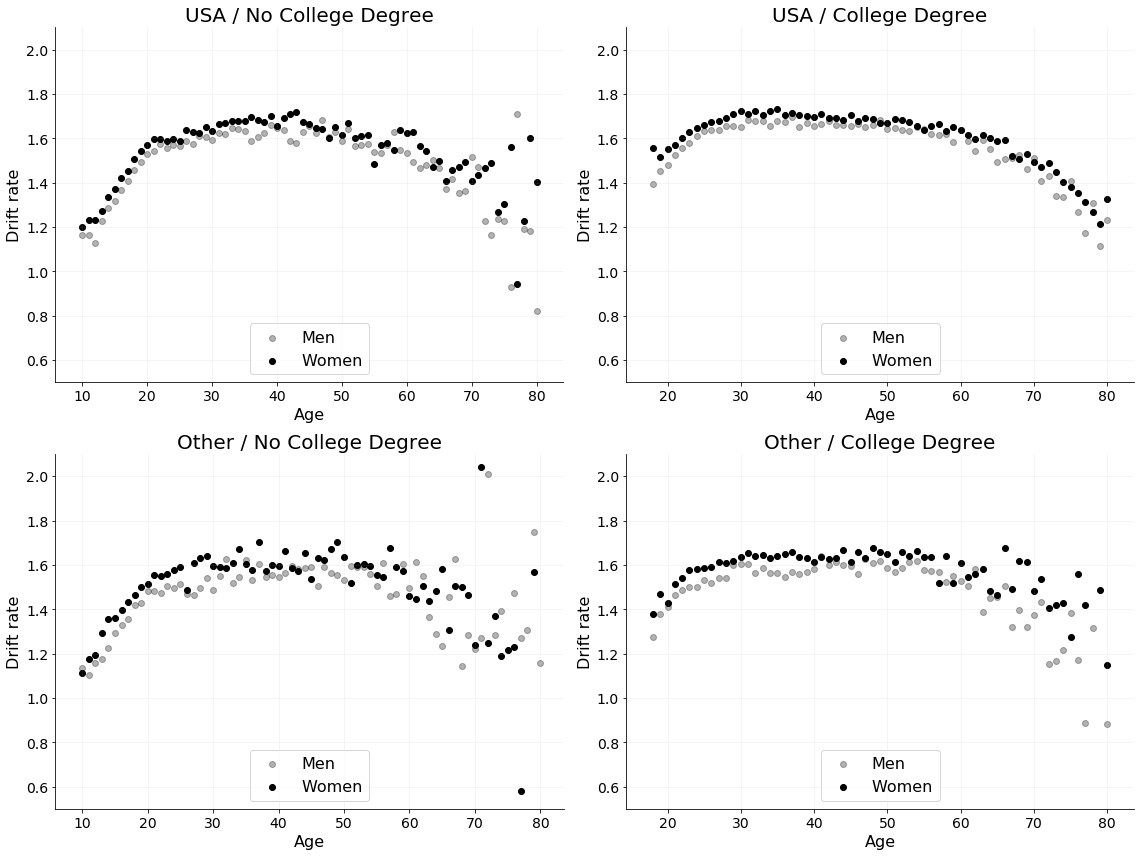

In [50]:
# Group data frame
df_grouped = df.groupby(['usa', 'college', 'birthsex', 'age'], as_index=False).mean()
# Set everybody below 18 who has college to nan
df_grouped['v1'][(df_grouped['age'] < 18) & (df_grouped['college'] == 1)] = np.nan

f, axarr = plt.subplots(2, 2, figsize=(16, 12))

df_men = df[df['birthsex'] == 0]
df_woman = df[df['birthsex'] == 1]

titles = ['USA / No College Degree', 'USA / College Degree', 
          'Other / No College Degree', 'Other / College Degree']

# Plot USA, no college
to_plot = df_grouped[df_grouped['usa'] == 1]
to_plot = to_plot[to_plot['college'] == 0]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v1']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v1']]


axarr[0, 0].scatter(to_plot_m['age'], to_plot_m['v1'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 0].scatter(to_plot_f['age'], to_plot_f['v1'], color='black', marker='o', label='Women')


# Plot USA, college
to_plot = df_grouped[df_grouped['usa'] == 1]
to_plot = to_plot[to_plot['college'] == 1]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v1']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v1']]

axarr[0, 1].scatter(to_plot_m['age'], to_plot_m['v1'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 1].scatter(to_plot_f['age'], to_plot_f['v1'], color='black', marker='o', label='Women')

# Plot no USA, no college
to_plot = df_grouped[df_grouped['usa'] == 0]
to_plot = to_plot[to_plot['college'] == 0]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v1']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v1']]

axarr[1, 0].scatter(to_plot_m['age'], to_plot_m['v1'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 0].scatter(to_plot_f['age'], to_plot_f['v1'], color='black', marker='o', label='Women')

# Plot no USA, college
to_plot = df_grouped[df_grouped['usa'] == 0]
to_plot = to_plot[to_plot['college'] == 1]
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'v1']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'v1']]

axarr[1, 1].scatter(to_plot_m['age'], to_plot_m['v1'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 1].scatter(to_plot_f['age'], to_plot_f['v1'], color='black', marker='o', label='Women')


for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_title(titles[i], fontsize=20)
    ax.set_ylabel('Drift rate', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.legend(loc='lower center', fontsize=16)
    ax.grid(alpha=0.15)
    ax.set_ylim([0.5, 2.1])
f.tight_layout()
# f.savefig('Robustness.png', dpi=300)

In [70]:
df_grouped = pd.read_csv('mean_se_v1_grouped_by.csv', header=0)

D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


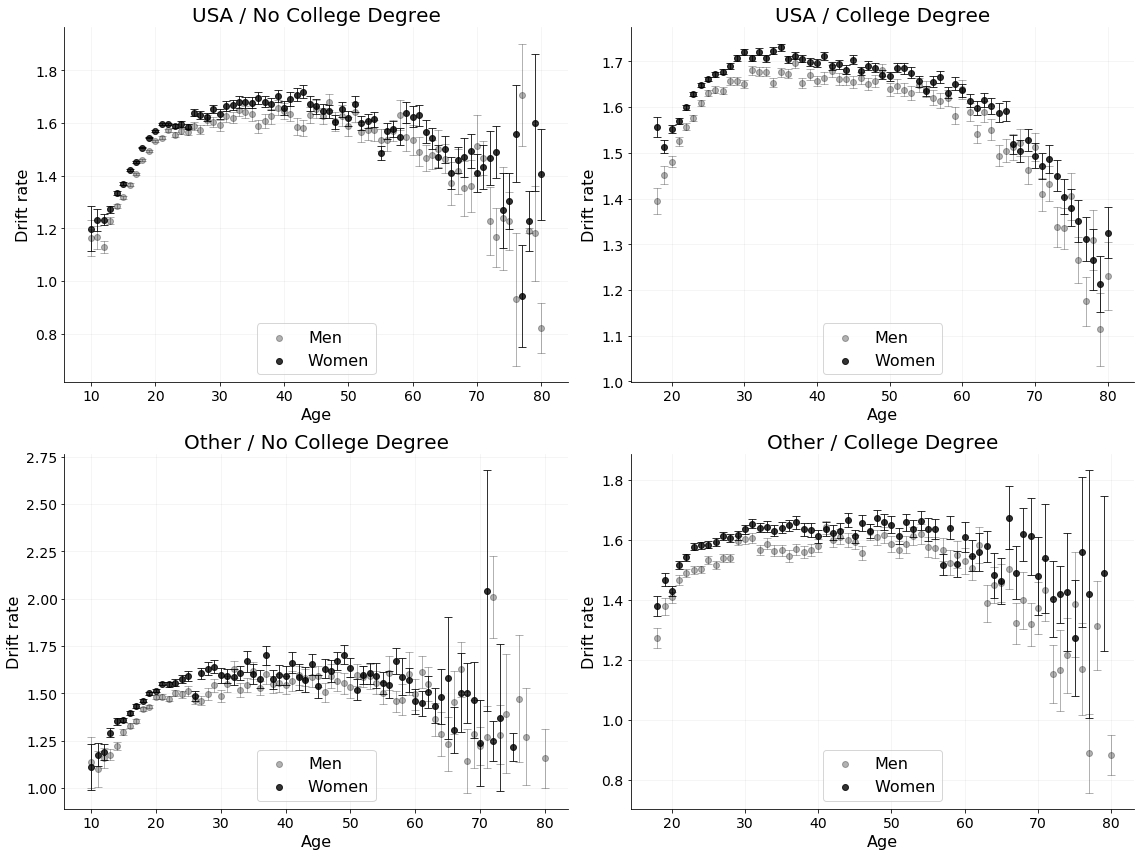

In [85]:
# Remove those with college < 18, most likely bullshit
df_grouped['mean'][(df_grouped['age'] < 18) & (df_grouped['college'] == 'college')] = np.nan
df_grouped['mean'][df_grouped['se'].isnull()] = np.nan

f, axarr = plt.subplots(2, 2, figsize=(16, 12))


titles = ['USA / No College Degree', 'USA / College Degree', 
          'Other / No College Degree', 'Other / College Degree']

# Plot USA, no college
to_plot = df_grouped[df_grouped['usa'] == 'USA']
to_plot = to_plot[to_plot['college'] == 'nocollege']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean', 'se']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean', 'se']]


axarr[0, 0].scatter(to_plot_m['age'], to_plot_m['mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 0].scatter(to_plot_f['age'], to_plot_f['mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[0, 0].legend(loc='lower center', fontsize=16)
axarr[0, 0].errorbar(to_plot_m['age'], to_plot_m['mean'], to_plot_m['se'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0, 0].errorbar(to_plot_f['age'], to_plot_f['mean'], to_plot_f['se'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)


# Plot USA, college
to_plot = df_grouped[df_grouped['usa'] == 'USA']
to_plot = to_plot[to_plot['college'] == 'college']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean', 'se']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean', 'se']]

axarr[0, 1].scatter(to_plot_m['age'], to_plot_m['mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 1].scatter(to_plot_f['age'], to_plot_f['mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[0, 1].legend(loc='lower center', fontsize=16)
axarr[0, 1].errorbar(to_plot_m['age'], to_plot_m['mean'], to_plot_m['se'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0, 1].errorbar(to_plot_f['age'], to_plot_f['mean'], to_plot_f['se'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)

# Plot no USA, no college
to_plot = df_grouped[df_grouped['usa'] == 'other']
to_plot = to_plot[to_plot['college'] == 'nocollege']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean', 'se']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean', 'se']]

axarr[1, 0].scatter(to_plot_m['age'], to_plot_m['mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 0].scatter(to_plot_f['age'], to_plot_f['mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[1, 0].legend(loc='lower center', fontsize=16)
axarr[1, 0].errorbar(to_plot_m['age'], to_plot_m['mean'], to_plot_m['se'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1, 0].errorbar(to_plot_f['age'], to_plot_f['mean'], to_plot_f['se'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)

# Plot no USA, college
to_plot = df_grouped[df_grouped['usa'] == 'other']
to_plot = to_plot[to_plot['college'] == 'college']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean', 'se']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean', 'se']]

axarr[1, 1].scatter(to_plot_m['age'], to_plot_m['mean'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 1].scatter(to_plot_f['age'], to_plot_f['mean'], color='black', marker='o', alpha=0.8, label='Women')
axarr[1, 1].legend(loc='lower center', fontsize=16)
axarr[1, 1].errorbar(to_plot_m['age'], to_plot_m['mean'], to_plot_m['se'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1, 1].errorbar(to_plot_f['age'], to_plot_f['mean'], to_plot_f['se'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)



for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_title(titles[i], fontsize=20)
    ax.set_ylabel('Drift rate', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
#     ax.set_ylim([0.5, 2.4])
f.tight_layout()
f.savefig('Robustness.png', dpi=300)

In [6]:
df_grouped = pd.read_csv('mean_se_v1_v2.csv', header=0)

In [97]:
df_grouped.head()

,age,birthsex,college,mean_v1,mean_v2,se_v1,se_v2
0,10,1.0,college,1.416550,2.570058,0.156645,0.401420
1,10,1.0,nocollege,1.156512,2.152338,0.060123,0.141378
2,10,1.0,NaN,1.124315,2.128713,0.105212,0.326006
3,10,2.0,college,1.247531,2.459322,0.235969,0.605650
4,10,2.0,nocollege,1.182306,2.074479,0.073663,0.112831


D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\envs\TensorFlowGpu\lib\site-pack

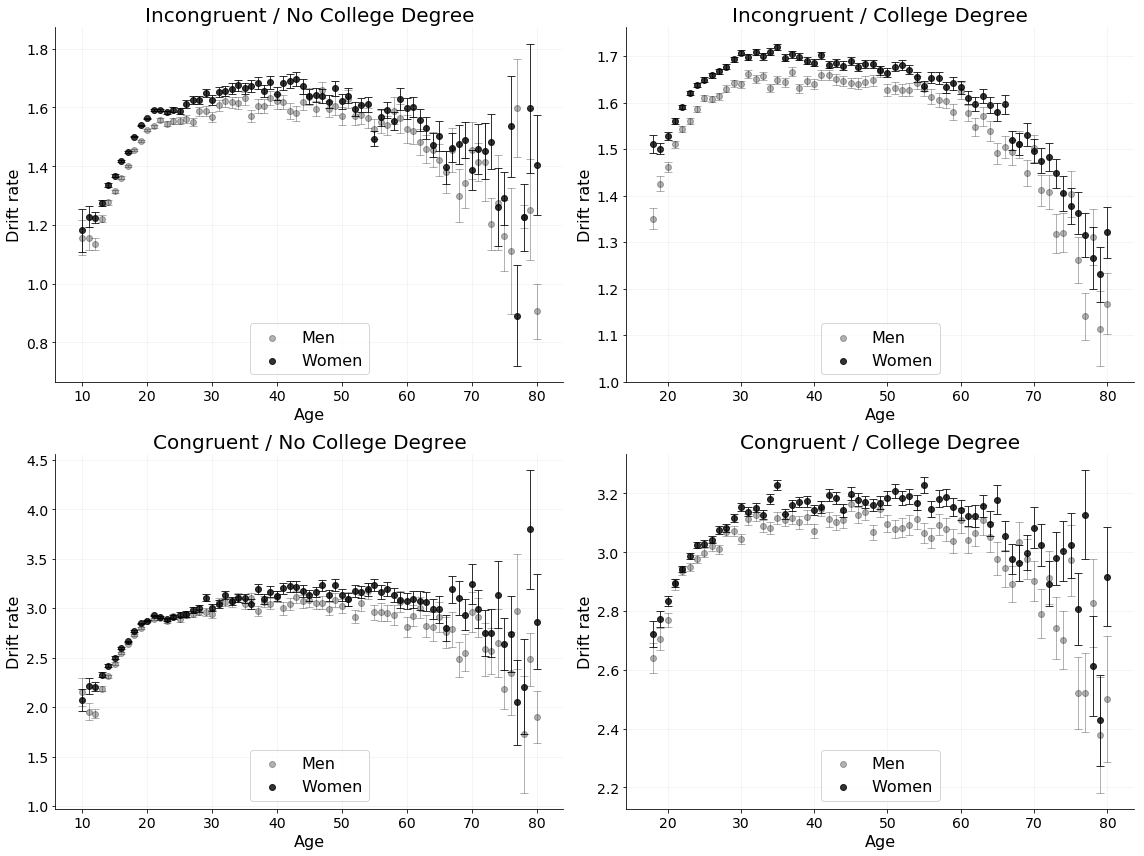

In [14]:
# Remove those with college < 18, most likely bullshit
df_grouped['mean_v1'][(df_grouped['age'] < 18) & (df_grouped['college'] == 'college')] = np.nan
df_grouped['mean_v2'][(df_grouped['age'] < 18) & (df_grouped['college'] == 'college')] = np.nan

# Single-person groups nan
df_grouped['mean_v1'][df_grouped['se_v1'].isnull()] = np.nan
df_grouped['mean_v2'][df_grouped['se_v2'].isnull()] = np.nan

f, axarr = plt.subplots(2, 2, figsize=(16, 12))


titles = ['Incongruent / No College Degree', 'Incongruent / College Degree', 
          'Congruent / No College Degree', 'Congruent / College Degree']

# Plot v1, no college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 'nocollege']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean_v1', 'se_v1']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean_v1', 'se_v1']]


axarr[0, 0].scatter(to_plot_m['age'], to_plot_m['mean_v1'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 0].scatter(to_plot_f['age'], to_plot_f['mean_v1'], color='black', marker='o', alpha=0.8, label='Women')
axarr[0, 0].legend(loc='lower center', fontsize=16)
axarr[0, 0].errorbar(to_plot_m['age'], to_plot_m['mean_v1'], to_plot_m['se_v1'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0, 0].errorbar(to_plot_f['age'], to_plot_f['mean_v1'], to_plot_f['se_v1'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)


# Plot v1, college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 'college']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean_v1', 'se_v1']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean_v1', 'se_v1']]

axarr[0, 1].scatter(to_plot_m['age'], to_plot_m['mean_v1'], color='black', marker='o', alpha=0.3, label='Men')
axarr[0, 1].scatter(to_plot_f['age'], to_plot_f['mean_v1'], color='black', marker='o', alpha=0.8, label='Women')
axarr[0, 1].legend(loc='lower center', fontsize=16)
axarr[0, 1].errorbar(to_plot_m['age'], to_plot_m['mean_v1'], to_plot_m['se_v1'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[0, 1].errorbar(to_plot_f['age'], to_plot_f['mean_v1'], to_plot_f['se_v1'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)

# Plot incongruent, no college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 'nocollege']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean_v2', 'se_v2']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean_v2', 'se_v2']]

axarr[1, 0].scatter(to_plot_m['age'], to_plot_m['mean_v2'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 0].scatter(to_plot_f['age'], to_plot_f['mean_v2'], color='black', marker='o', alpha=0.8, label='Women')
axarr[1, 0].legend(loc='lower center', fontsize=16)
axarr[1, 0].errorbar(to_plot_m['age'], to_plot_m['mean_v2'], to_plot_m['se_v2'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1, 0].errorbar(to_plot_f['age'], to_plot_f['mean_v2'], to_plot_f['se_v2'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)

# Plot no USA, college
to_plot = df_grouped
to_plot = to_plot[to_plot['college'] == 'college']
to_plot_m = to_plot[to_plot['birthsex'] == 1.0][['age', 'mean_v2', 'se_v2']]
to_plot_f = to_plot[to_plot['birthsex'] == 2.0][['age', 'mean_v2', 'se_v2']]

axarr[1, 1].scatter(to_plot_m['age'], to_plot_m['mean_v2'], color='black', marker='o', alpha=0.3, label='Men')
axarr[1, 1].scatter(to_plot_f['age'], to_plot_f['mean_v2'], color='black', marker='o', alpha=0.8, label='Women')
axarr[1, 1].legend(loc='lower center', fontsize=16)
axarr[1, 1].errorbar(to_plot_m['age'], to_plot_m['mean_v2'], to_plot_m['se_v2'], capsize=4, fmt='none',
                    color='black', alpha=0.3, linewidth=1)
axarr[1, 1].errorbar(to_plot_f['age'], to_plot_f['mean_v2'], to_plot_f['se_v2'], capsize=4, fmt='none',
                    color='black', alpha=0.8, linewidth=1)


for i, ax in enumerate(axarr.flat):
    sns.despine(ax=ax)
    ax.set_title(titles[i], fontsize=20)
    ax.set_ylabel('Drift rate', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.grid(alpha=0.15)
#     if i < 2:
#         ax.set_ylim([0.6, 2.0])
#     else:
#         ax.set_ylim([1.0, 4.5])
f.tight_layout()
f.savefig('Robustness.png', dpi=300)